First, import nesassary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

[(0, 1), (0, 1)]

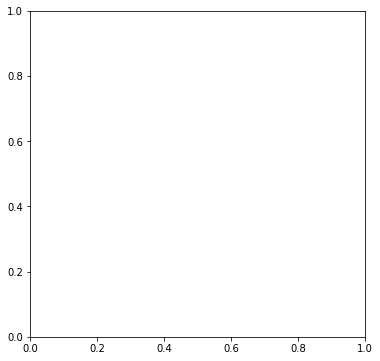

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set(xlim=(0, 1), ylim=(0, 1))

In [3]:
xp = []
yp = []
xm = []
ym = []
x1 = []
y1 = []

In [4]:
def circular(ax, i, w, theta, a_plus, a_minus, chi):
    dxp = a_plus * np.cos(theta[i] + chi) / np.sqrt(2)
    dyp = a_plus * np.sin(theta[i] + chi) / np.sqrt(2)

    dxm = a_minus * np.cos(theta[i] - chi) / np.sqrt(2)
    dym = -a_minus * np.sin(theta[i] - chi) / np.sqrt(2)
    
    ax.arrow(x = 0, y = 0, dx = dxp, dy = dyp, head_width = w, head_length = w, fc = 'red', ec = 'red')
    ax.arrow(x = 0, y = 0, dx = dxm, dy = dym, head_width = w, head_length = w, fc = 'green', ec = 'green')
    
    xp.append(dxp)
    yp.append(dyp)
    xm.append(dxm)
    ym.append(dym)

    ax.plot(xp, yp, ':', color = 'red')
    ax.plot(xm, ym, ':', color = 'green')

In [5]:
def updatefig(i, a_plus, a_minus, alpha_plus, alpha_minus, theta, w, b_linear, b_circular):
    ax.cla()
    
    if i == 0:
        xp.clear()
        yp.clear()
        xm.clear()
        ym.clear()
        x1.clear()
        y1.clear()
    

    major = (a_minus + a_plus) / np.sqrt(2.)
    minor = (a_minus - a_plus) / np.sqrt(2.)
    chi = 0.5 * (alpha_minus - alpha_plus)
        
    dx1 = major * np.cos(theta[i])*np.cos(chi) + minor * np.sin(theta[i])*np.sin(chi)
    dy1 = -minor * np.sin(theta[i])*np.cos(chi) + major * np.cos(theta[i])*np.sin(chi)
    
    if b_linear:
        ax.arrow(x = 0, y = 0, dx = dx1, dy = 0, head_width = w, head_length = w, fc = 'blue', ec = 'blue')
        ax.arrow(x = 0, y = 0, dx = 0, dy = dy1, head_width = w, head_length = w, fc = 'orange', ec = 'orange')

    ax.arrow(x = 0, y = 0, dx = dx1, dy = dy1, head_width = w, head_length = w, fc = 'black', ec = 'black')
    
    if b_circular:
        circular(ax, i, w, theta, a_plus, a_minus, chi)
    
    x1.append(dx1)
    y1.append(dy1)

    ax.plot(x1, y1, ':', color = 'black')

    l = 1.2 * major
    ax.set(xlim=(-l, l), ylim=(-l, l))

In [6]:
a_plus = 2
a_minus = 1
alpha_plus = np.pi / 3
alpha_minus = 0

In [9]:
from matplotlib import animation

theta = np.linspace(0, 4 * np.pi, 100)
b_linear = True
b_circular = True
w = 0.05

args = (a_plus, a_minus, alpha_plus, alpha_minus, theta, w, b_linear, b_circular)
anim = animation.FuncAnimation(fig, updatefig, fargs = args, frames=len(theta), blit=False, repeat=True)

In [10]:
from IPython.display import HTML
HTML(anim.to_html5_video())